In [19]:
import re
def strip_all_but_numbers(stub):
    return int(re.sub('\D', '', stub))

In [20]:
import os

directory = "./output"
print(type(directory))
target_string="ENERGY| Total FORCE_EVAL ( QS ) energy (a.u.):"
mapping={}

for file in os.listdir(directory):
    filename = os.fsdecode(directory+"/"+file)
    if filename.endswith(".out"): 
        with open(filename,'r') as f:
            for line in f:
                if target_string in line:
                    mapping[strip_all_but_numbers(filename)]=float(line.replace(target_string,''))
                    break
        continue
    else:
        continue

<class 'str'>


In [67]:
temp=list(mapping.keys())
temp.sort()
temp

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

<module 'matplotlib.pyplot' from '/home/mayank/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

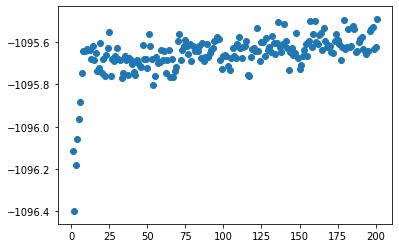

In [22]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*mapping.items()))
plt

In [23]:
import collections
od = collections.OrderedDict(sorted(mapping.items()))

<module 'matplotlib.pyplot' from '/home/mayank/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

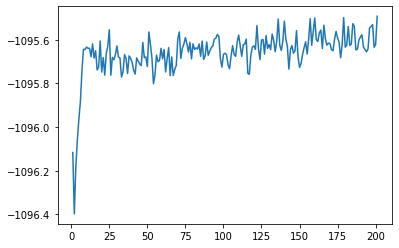

In [24]:
plt.plot(*zip(*od.items()))
plt

In [25]:
directory = "../coordinates_training/"
print(type(directory))
target_string="TotEnergy="
precalcEnergy={}

for file in os.listdir(directory):
    filename = os.fsdecode(directory+file)
    if filename.endswith(".xyz"): 
        with open(filename,'r') as f:
            for line in f:
                if target_string in line:
                    splits=line.split(' ')
                    energy=splits[0]
                    precalcEnergy[strip_all_but_numbers(filename)]=float(energy.replace(target_string,''))
                    break
        continue
    else:
        continue

<class 'str'>


<module 'matplotlib.pyplot' from '/home/mayank/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

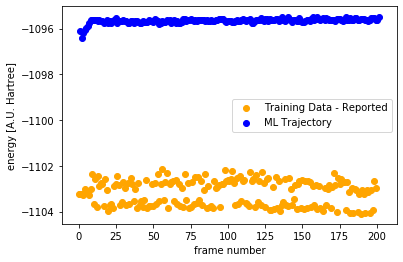

In [26]:
plt.scatter(*zip(*precalcEnergy.items()),color="orange",label="Training Data - Reported")
plt.scatter(*zip(*mapping.items()),color="blue",label="ML Trajectory")
plt.legend()
plt.xlabel("frame number")
plt.ylabel("energy [A.U. Hartree]")
plt

In [27]:
differences={}
for i in mapping:
    i=int(i)
    try:
        differences[i]=mapping[i]-precalcEnergy[i]
    except:
        print("%i doesnt exist")
    

%i doesnt exist
%i doesnt exist


In [28]:
differences

{176: 6.979394186967738,
 114: 8.129737083924283,
 124: 7.066800115551359,
 8: 7.376491789095553,
 51: 7.188444381821455,
 186: 7.514760442731131,
 188: 7.590416289740915,
 91: 7.020587499919429,
 107: 7.98613818611102,
 116: 6.925736821662213,
 132: 6.911204649622277,
 33: 6.957663527055956,
 19: 7.441912210904775,
 55: 7.046617702058484,
 31: 7.296780123952658,
 123: 6.610691038616551,
 160: 8.38450962570505,
 136: 8.190596205343581,
 28: 8.01710565614053,
 44: 7.812929727037954,
 161: 7.282258260493336,
 191: 7.660938365356515,
 151: 8.18482880339775,
 195: 8.415305571014414,
 115: 6.689243710796973,
 99: 6.9579565667477254,
 1: 7.129325976544351,
 67: 7.02402996894989,
 62: 6.9516007299339435,
 79: 7.9333896017594725,
 82: 7.0439139616764805,
 85: 6.681794727368697,
 105: 8.017717526904107,
 58: 7.017067628188215,
 185: 7.483158408435884,
 54: 7.715090612085305,
 174: 6.968301944702262,
 14: 7.257227728613316,
 112: 7.952150448724524,
 69: 7.255979404066693,
 41: 7.974172356763802,

<module 'matplotlib.pyplot' from '/home/mayank/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

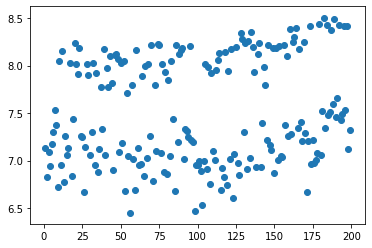

In [29]:
plt.scatter(*zip(*differences.items()))
plt

In [38]:
filename="../slurm-out7"
target_string="### NNP EW SUMMARY ###"
target_number=493
energy_list=[]
with open(filename,'r') as f:
    lines=f.readlines()
    energy_list.append(lines[target_number-1].split())
    for ind in range(target_number,len(lines)):
        if(target_string in lines[ind]):
            pass
        elif("Loop time" in lines[ind]):
            break
        else:
            energy_list.append(lines[ind].split())

In [39]:
import pandas as pd
header=energy_list.pop(0)
df = pd.DataFrame(energy_list, columns=header)
df['Step'] = df['Step'].astype(int)
df['TotEng'] = df['TotEng'].astype(float)
df

,Step,Temp,E_pair,E_mol,TotEng,Press
0,0,0,-30039.2,0,-30039.200,719.23759
1,1,8.1409265,-30039.407,0,-30039.206,689.44014
2,2,28.416286,-30039.924,0,-30039.222,605.33679
3,3,50.908637,-30040.492,0,-30039.235,480.95995
4,4,65.547515,-30040.856,0,-30039.238,334.70744
...,...,...,...,...,...,...
9996,9996,294.68341,-30033.818,0,-30026.543,11.31899
9997,9997,300.14723,-30033.918,0,-30026.508,35.206049
9998,9998,306.58696,-30034.042,0,-30026.473,55.06749
9999,9999,312.22894,-30034.147,0,-30026.439,69.953712


In [52]:
df['TotEng'][0]

-30039.2

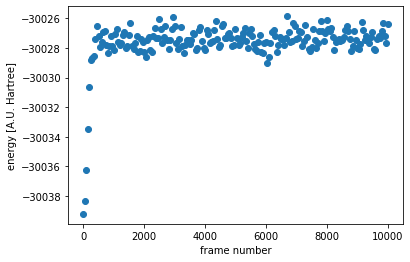

In [40]:

plt.scatter(df['Step'][0::50],df['TotEng'][0::50])
plt.xlabel("frame number")
plt.ylabel("energy [A.U. Hartree]")
plt.show()

In [84]:
factor={}
for i in mapping:
    i=int(i)
    try:
        factor[i]=df['TotEng'][50*(i-1)]/mapping[i]
    except:
        print("%i doesnt exist")

<module 'matplotlib.pyplot' from '/home/mayank/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

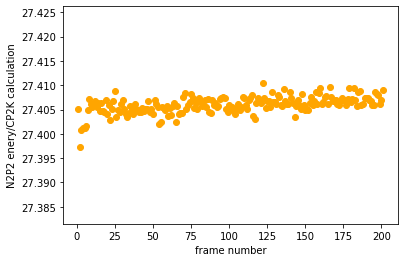

In [85]:
plt.scatter(*zip(*factor.items()),color="orange")
plt.ylabel("N2P2 enery/CP2K calculation")
plt.xlabel("frame number")
plt

In [89]:
df['Cp2k']=[0]*len(df)
df['Cp2k'] = df['Cp2k'].astype(float)
df

,Step,Temp,E_pair,E_mol,TotEng,Press,Cp2k
0,0,0,-30039.2,0,-30039.200,719.23759,0.0
1,1,8.1409265,-30039.407,0,-30039.206,689.44014,0.0
2,2,28.416286,-30039.924,0,-30039.222,605.33679,0.0
3,3,50.908637,-30040.492,0,-30039.235,480.95995,0.0
4,4,65.547515,-30040.856,0,-30039.238,334.70744,0.0
...,...,...,...,...,...,...,...
9996,9996,294.68341,-30033.818,0,-30026.543,11.31899,0.0
9997,9997,300.14723,-30033.918,0,-30026.508,35.206049,0.0
9998,9998,306.58696,-30034.042,0,-30026.473,55.06749,0.0
9999,9999,312.22894,-30034.147,0,-30026.439,69.953712,0.0


In [91]:
for i in mapping:
    df['Cp2k'][50*(i-1)]=mapping[i]
df

/home/mayank/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Step,Temp,E_pair,E_mol,TotEng,Press,Cp2k
0,0,0,-30039.2,0,-30039.200,719.23759,-1096.116444
1,1,8.1409265,-30039.407,0,-30039.206,689.44014,0.000000
2,2,28.416286,-30039.924,0,-30039.222,605.33679,0.000000
3,3,50.908637,-30040.492,0,-30039.235,480.95995,0.000000
4,4,65.547515,-30040.856,0,-30039.238,334.70744,0.000000
...,...,...,...,...,...,...,...
9996,9996,294.68341,-30033.818,0,-30026.543,11.31899,0.000000
9997,9997,300.14723,-30033.918,0,-30026.508,35.206049,0.000000
9998,9998,306.58696,-30034.042,0,-30026.473,55.06749,0.000000
9999,9999,312.22894,-30034.147,0,-30026.439,69.953712,0.000000


AttributeError: 'function' object has no attribute 'setlabel'

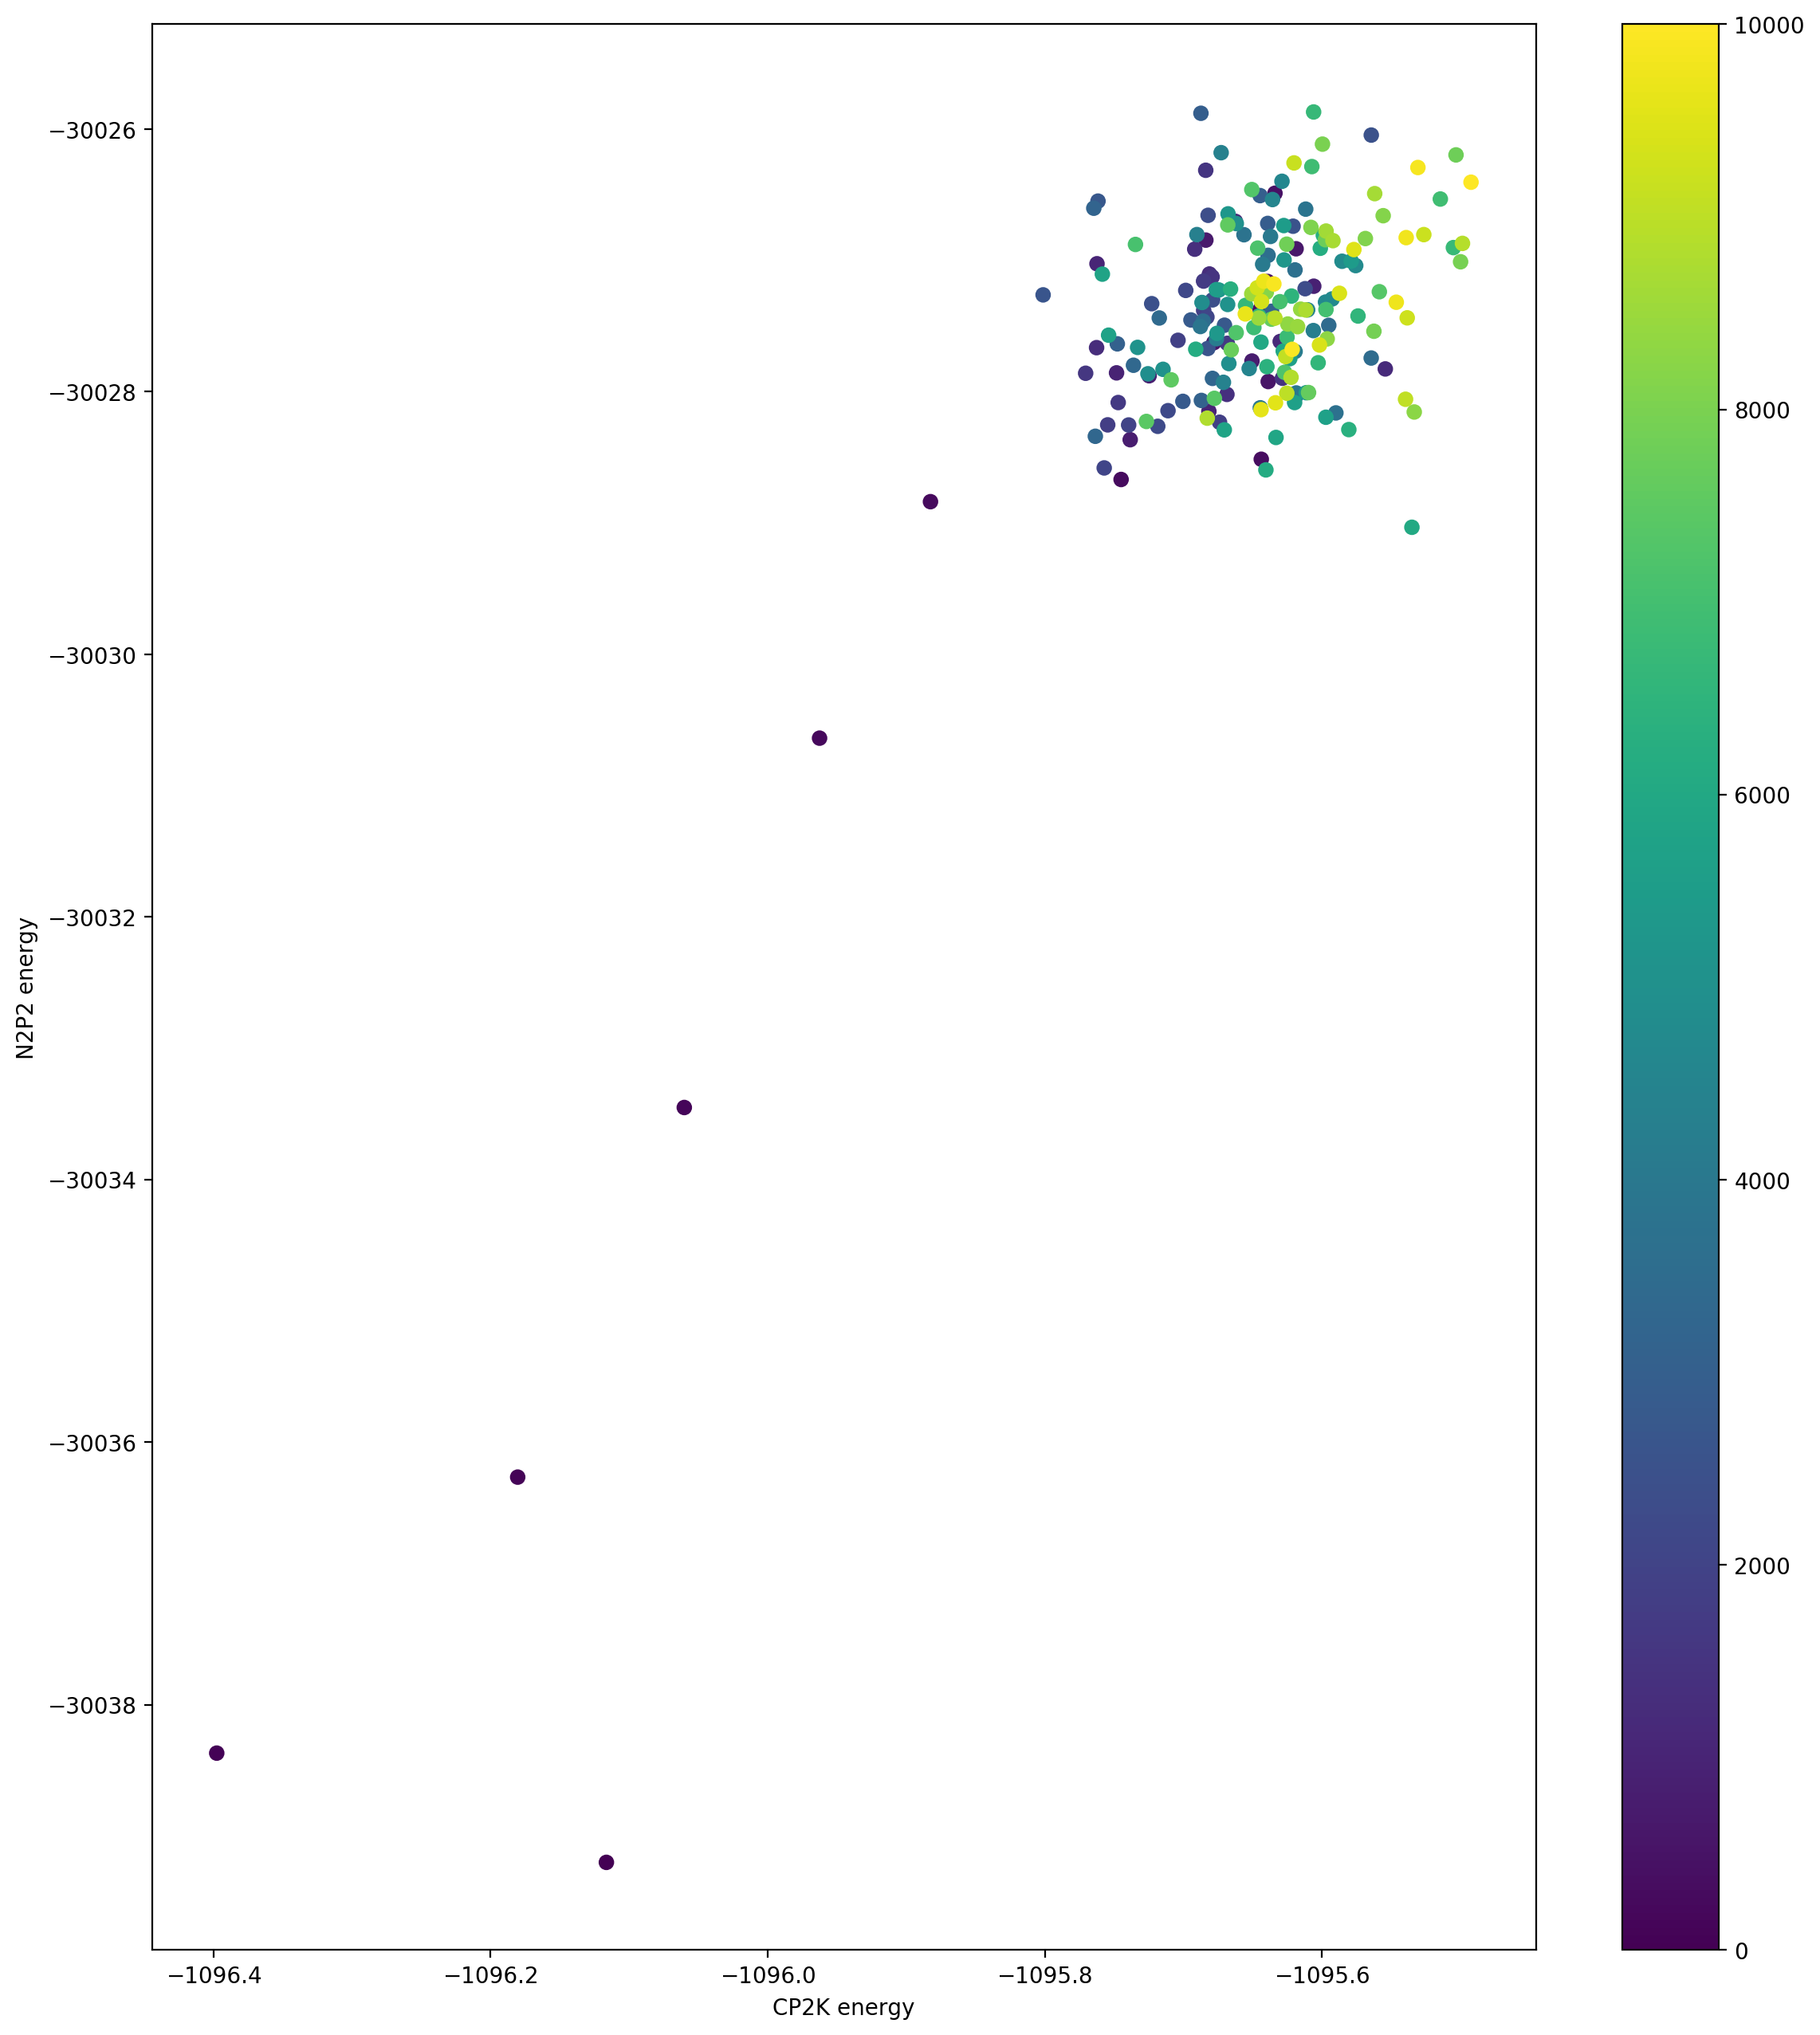

In [111]:
plt.scatter(df['Cp2k'][0::50],df['TotEng'][0::50],c=df['Step'][::50],picker=True)
plt.xlabel("CP2K energy")
plt.ylabel("N2P2 energy")
#plt.rcParams['figure.dpi'] = 200
#plt.rcParams['figure.figsize'] = [14, 16]
plt.colorbar()
plt.colorbar.setlabel("timestep")
plt.show()